In [133]:
import pandas as pd


Upload Datasets

In [134]:
df = pd.read_csv(r"C:\Users\ukasy\project ML\MBC_Project\train.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       746 non-null    int64  
 1   Age                      746 non-null    int64  
 2   Gender                   746 non-null    object 
 3   Patient_Address          746 non-null    object 
 4   Chest_Pain_Type          746 non-null    object 
 5   Resting_Blood_Pressure   742 non-null    float64
 6   Cholesterol_Level        722 non-null    float64
 7   Fasting_Blood_Sugar      660 non-null    object 
 8   Resting_ECG              744 non-null    object 
 9   Thalch                   743 non-null    float64
 10  Exercise_Induced_Angina  743 non-null    object 
 11  Oldpeak                  739 non-null    float64
 12  Slope                    529 non-null    object 
 13  CA                       312 non-null    float64
 14  Thal                     4

Drop kolom yg kurg berguna

In [135]:
drop_cols = ['ID', 'Patient_Address']

df.drop(columns=drop_cols, inplace=True)

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      746 non-null    int64  
 1   Gender                   746 non-null    object 
 2   Chest_Pain_Type          746 non-null    object 
 3   Resting_Blood_Pressure   742 non-null    float64
 4   Cholesterol_Level        722 non-null    float64
 5   Fasting_Blood_Sugar      660 non-null    object 
 6   Resting_ECG              744 non-null    object 
 7   Thalch                   743 non-null    float64
 8   Exercise_Induced_Angina  743 non-null    object 
 9   Oldpeak                  739 non-null    float64
 10  Slope                    529 non-null    object 
 11  CA                       312 non-null    float64
 12  Thal                     406 non-null    object 
 13  Have_Heart_Disease       746 non-null    int64  
dtypes: float64(5), int64(2), o

liat missinga values

In [136]:
df.isna().sum()

Age                          0
Gender                       0
Chest_Pain_Type              0
Resting_Blood_Pressure       4
Cholesterol_Level           24
Fasting_Blood_Sugar         86
Resting_ECG                  2
Thalch                       3
Exercise_Induced_Angina      3
Oldpeak                      7
Slope                      217
CA                         434
Thal                       340
Have_Heart_Disease           0
dtype: int64

Liat skew (untuk menentukan masukan missing values )

In [137]:
cols = df.select_dtypes(include='number').columns.tolist()

for col in cols:
    skew_cols = df[col].skew()
    print(f"skew {col} = {skew_cols}")

    
print(cols)

skew Age = -0.14572828731042073
skew Resting_Blood_Pressure = 0.6861549193348193
skew Cholesterol_Level = -0.6222989646217472
skew Thalch = -0.3519498835382844
skew Oldpeak = 1.2304560385077283
skew CA = 1.1547056649864775
skew Have_Heart_Disease = 0.0
['Age', 'Resting_Blood_Pressure', 'Cholesterol_Level', 'Thalch', 'Oldpeak', 'CA', 'Have_Heart_Disease']


Cek DF

In [138]:
df.head(10)

,Age,Gender,Chest_Pain_Type,Resting_Blood_Pressure,Cholesterol_Level,Fasting_Blood_Sugar,Resting_ECG,Thalch,Exercise_Induced_Angina,Oldpeak,Slope,CA,Thal,Have_Heart_Disease
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
5,56,Male,atypical angina,120.0,236.0,False,normal,178.0,False,0.8,upsloping,0.0,normal,0
6,62,Female,asymptomatic,140.0,268.0,False,lv hypertrophy,160.0,False,3.6,downsloping,2.0,normal,1
7,57,Female,asymptomatic,120.0,354.0,False,normal,163.0,True,0.6,upsloping,0.0,normal,0
8,63,Male,asymptomatic,130.0,254.0,False,lv hypertrophy,147.0,False,1.4,flat,1.0,reversable defect,1
9,53,Male,asymptomatic,140.0,203.0,True,lv hypertrophy,155.0,True,3.1,downsloping,0.0,reversable defect,1


Masukkan Nilai ke Missing Values

In [139]:
df['Resting_Blood_Pressure'] = df['Resting_Blood_Pressure'].fillna(df['Resting_Blood_Pressure'].median())
df['Cholesterol_Level'] = df['Cholesterol_Level'].fillna(df['Cholesterol_Level'].median())
df['CA'] = df['CA'].fillna(df['CA'].median())
df['Thalch'] = df['Thalch'].fillna(df['Thalch'].mean())
df['Oldpeak'] = df['Oldpeak'].fillna(df['Oldpeak'].median())


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      746 non-null    int64  
 1   Gender                   746 non-null    object 
 2   Chest_Pain_Type          746 non-null    object 
 3   Resting_Blood_Pressure   746 non-null    float64
 4   Cholesterol_Level        746 non-null    float64
 5   Fasting_Blood_Sugar      660 non-null    object 
 6   Resting_ECG              744 non-null    object 
 7   Thalch                   746 non-null    float64
 8   Exercise_Induced_Angina  743 non-null    object 
 9   Oldpeak                  746 non-null    float64
 10  Slope                    529 non-null    object 
 11  CA                       746 non-null    float64
 12  Thal                     406 non-null    object 
 13  Have_Heart_Disease       746 non-null    int64  
dtypes: float64(5), int64(2), o

Liat missing values selain kolom number

In [140]:
df.select_dtypes(include='object').isna().sum()

Gender                       0
Chest_Pain_Type              0
Fasting_Blood_Sugar         86
Resting_ECG                  2
Exercise_Induced_Angina      3
Slope                      217
Thal                       340
dtype: int64

isi missing values pada kolom object dengan mewnggunakan modus

In [141]:
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].fillna(df[col].mode()[0])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 746 entries, 0 to 745
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Age                      746 non-null    int64  
 1   Gender                   746 non-null    object 
 2   Chest_Pain_Type          746 non-null    object 
 3   Resting_Blood_Pressure   746 non-null    float64
 4   Cholesterol_Level        746 non-null    float64
 5   Fasting_Blood_Sugar      746 non-null    bool   
 6   Resting_ECG              746 non-null    object 
 7   Thalch                   746 non-null    float64
 8   Exercise_Induced_Angina  746 non-null    bool   
 9   Oldpeak                  746 non-null    float64
 10  Slope                    746 non-null    object 
 11  CA                       746 non-null    float64
 12  Thal                     746 non-null    object 
 13  Have_Heart_Disease       746 non-null    int64  
dtypes: bool(2), float64(5), in

C:\Users\ukasy\AppData\Local\Temp\ipykernel_5896\638984055.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df[col] = df[col].fillna(df[col].mode()[0])


Cek DF lagi 

In [142]:
df.head(5)

,Age,Gender,Chest_Pain_Type,Resting_Blood_Pressure,Cholesterol_Level,Fasting_Blood_Sugar,Resting_ECG,Thalch,Exercise_Induced_Angina,Oldpeak,Slope,CA,Thal,Have_Heart_Disease
0,63,Male,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,67,Male,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


EDA

skew Age: -0.14543510415084204


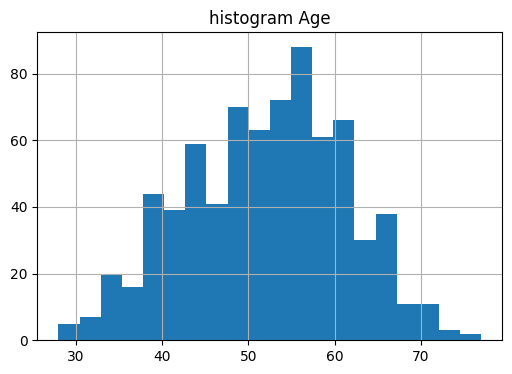

skew Resting_Blood_Pressure: 0.6882435936781361


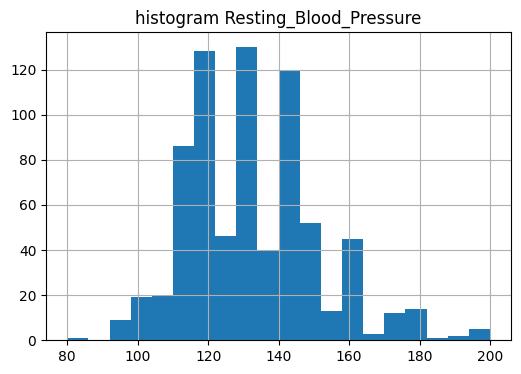

skew Cholesterol_Level: -0.6500603455095998


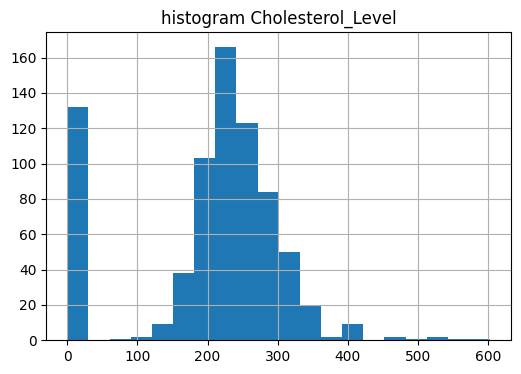

skew Thalch: -0.3519473351123737


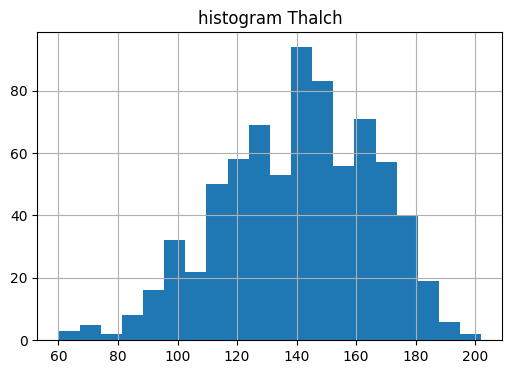

skew Oldpeak: 1.2424835872070883


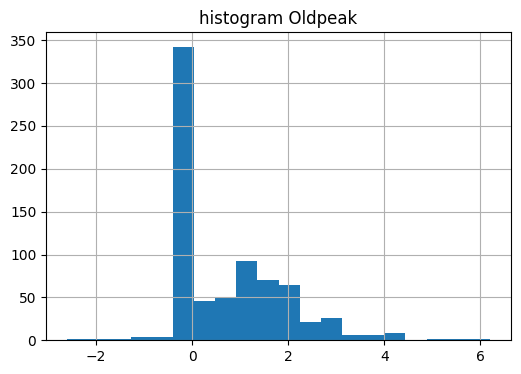

skew CA: 2.538281968309806


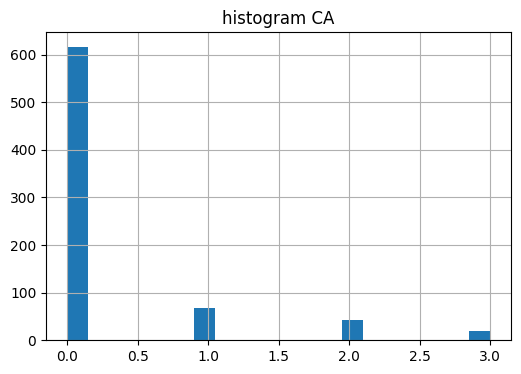

skew Have_Heart_Disease: 0.0


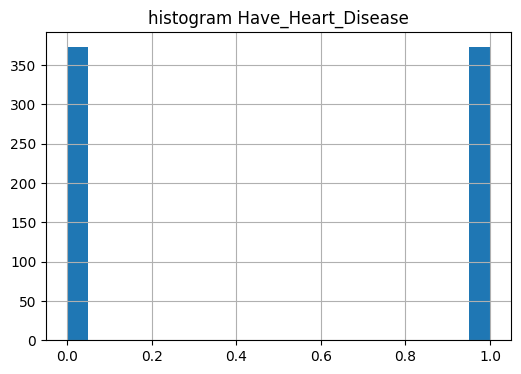

In [143]:
import matplotlib.pyplot as plt
from scipy.stats import skew
df_num = df.select_dtypes(include='number')

for cols in df_num.columns:
    df[cols].hist(bins=20, figsize=(6,4))
    skew_cols = skew(df[cols])
    print(f"skew {cols}: {skew_cols}")
    plt.title(f"histogram {cols}")
    plt.show()

Cek Value Counts Data 

In [144]:
df_cat = df.select_dtypes(include='object')

for cols in df_cat.columns:
    print(f" value {cols} = {df[cols].value_counts()}")

 value Gender = Gender
Male      555
Female    191
Name: count, dtype: int64
 value Chest_Pain_Type = Chest_Pain_Type
asymptomatic       377
atypical angina    166
non-anginal        164
typical angina      39
Name: count, dtype: int64
 value Resting_ECG = Resting_ECG
normal              483
lv hypertrophy      164
st-t abnormality     99
Name: count, dtype: int64
 value Slope = Slope
flat           517
upsloping      193
downsloping     36
Name: count, dtype: int64
 value Thal = Thal
normal               537
reversable defect    171
fixed defect          38
Name: count, dtype: int64


kita gunakan label encoding pada df.gender krna ada 2 value (male, female)

In [145]:
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

df.head(5)

,Age,Gender,Chest_Pain_Type,Resting_Blood_Pressure,Cholesterol_Level,Fasting_Blood_Sugar,Resting_ECG,Thalch,Exercise_Induced_Angina,Oldpeak,Slope,CA,Thal,Have_Heart_Disease
0,63,0,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,0,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,1
2,67,0,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,0,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,1,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


skrg yg punya 3 value, kita gunakan label encoding jg

In [146]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_cat = df_cat.drop(columns=['Gender'])

for col in df_cat.columns:
    df[col] = le.fit_transform(df[col])

df.head()


,Age,Gender,Chest_Pain_Type,Resting_Blood_Pressure,Cholesterol_Level,Fasting_Blood_Sugar,Resting_ECG,Thalch,Exercise_Induced_Angina,Oldpeak,Slope,CA,Thal,Have_Heart_Disease
0,63,0,3,145.0,233.0,True,0,150.0,False,2.3,0,0.0,0,0
1,67,0,0,160.0,286.0,False,0,108.0,True,1.5,1,3.0,1,1
2,67,0,0,120.0,229.0,False,0,129.0,True,2.6,1,2.0,2,1
3,37,0,2,130.0,250.0,False,1,187.0,False,3.5,0,0.0,1,0
4,41,1,1,130.0,204.0,False,0,172.0,False,1.4,2,0.0,1,0


Type Bool tidak perlu diencoding, karena RandomForest bsa lgsg membacanya

Buat Model RandomClassifier

In [147]:
from sklearn.datasets import make_classification
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score


model = RandomForestClassifier(n_estimators=100, random_state=42)

x = df.drop(columns=["Have_Heart_Disease"])
y = df["Have_Heart_Disease"]

x_train,x_test,y_train,y_test = train_test_split(x,y, test_size=0.2, random_state=42)


model.fit(x_train, y_train)


y_pred = model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
score= f1_score(y_test,y_pred)



print(f"Akurasi: {accuracy:.2f}")
print(f"F1-score: {score:.2f}")


Akurasi: 0.85
F1-score: 0.84


Masukkan data_test ke model buat di predict

In [148]:
df_test = pd.read_csv(r"C:\Users\ukasy\project ML\MBC_Project\test.csv")

df_test['Gender'] = df_test['Gender'].map({'Male': 0, 'Female': 1})


le = LabelEncoder()

df_test_cat = df_test.select_dtypes(include='object')

for col in df_test_cat.columns:
    df_test[col] = le.fit_transform(df_test[col])


df_test.drop(columns=['ID','Patient_Address'], inplace=True)
df_test.head()


,Age,Gender,Chest_Pain_Type,Resting_Blood_Pressure,Cholesterol_Level,Fasting_Blood_Sugar,Resting_ECG,Thalch,Exercise_Induced_Angina,Oldpeak,Slope,CA,Thal
0,63,0,0,170.0,177.0,0,1,84.0,1,2.5,0,NaN,3
1,46,0,0,110.0,236.0,0,1,125.0,1,2.0,1,NaN,3
2,63,0,0,126.0,0.0,0,2,120.0,0,1.5,0,NaN,3
3,60,0,0,152.0,0.0,0,2,118.0,1,0.0,3,NaN,2
4,58,0,0,116.0,0.0,0,1,124.0,0,1.0,2,NaN,3


In [149]:



sample_submission = pd.read_csv(r"C:\Users\ukasy\project ML\MBC_Project\sample_submission.csv")

sample_submission['Have_Heart_Disease'] = model.predict(df_test)
sample_submission.to_csv("subbmission2.csv", index=False)




pke xgboost

In [150]:
from xgboost import XGBClassifier

model_2 = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
model_2.fit(x_train, y_train)


sample_submission['Have_Heart_Disease'] = model_2.predict(df_test)
sample_submission.to_csv("subbmission_3.csv", index=False)

C:\Users\ukasy\AppData\Roaming\Python\Python312\site-packages\xgboost\core.py:158: UserWarning: [00:10:37] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
